# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2 
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [7]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url)
btc_response_content_json = btc_response_data.json()
btc_price = int(btc_response_content_json["data"]["1"]["quotes"]["CAD"]["price"])

# Fetch current ETH price
eth_response_data = requests.get(eth_url)
eth_response_content_json = eth_response_data.json()
eth_price = int(eth_response_content_json["data"]["1027"]["quotes"]["CAD"]["price"])


# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")


The current value of your 1.2 BTC is $76861.20
The current value of your 5.3 ETH is $29362.00


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [10]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [11]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
api = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = "v2"
)

In [20]:
# Format current date as ISO format
from datetime import datetime
today = datetime.now().isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
bar = api.get_barset(tickers, timeframe, start=today, end=today, limit=1000).df

# Preview DataFrame
bar

AGG                                         \
                             open      high       low    close    volume   
time                                                                       
2017-12-18 00:00:00-05:00  109.47  109.4700  109.2500  109.310   3090761   
2017-12-19 00:00:00-05:00  109.14  109.1600  108.8900  109.000   2583809   
2017-12-20 00:00:00-05:00  108.75  108.8800  108.7059  108.770   3123756   
2017-12-21 00:00:00-05:00  108.76  108.8700  108.7300  108.830   2173058   
2017-12-22 00:00:00-05:00  108.82  108.8900  108.8100  108.880   2952430   
...                           ...       ...       ...      ...       ...   
2021-12-01 00:00:00-05:00  114.27  114.6400  114.2100  114.610  11306707   
2021-12-02 00:00:00-05:00  114.67  114.7900  114.4001  114.610   7507924   
2021-12-03 00:00:00-05:00  114.50  115.2400  114.4600  115.060   7279561   
2021-12-06 00:00:00-05:00  114.98  115.0391  114.6196  114.660   6364620   
2021-12-07 00:00:00-05:00  114.52  114.7100  114.4500  114.475   5783341   

                              SPY                                        
                             open     high       low   close     volume  
time                                                                     
2017-12-18 00:00:00-05:00  268.08  268.600  267.9800  268.18   45691370  
2017-12-19 00:00:00-05:00  268.48  268.530  267.0900  267.22   46990895  
2017-12-20 00:00:00-05:00  268.25  268.330  266.6900  267.04   42133908  
2017-12-21 00:00:00-05:00  267.73  268.385  267.3000  267.57   34999954  
2017-12-22 00:00:00-05:00  267.60  267.635  266.9000  267.48   36604044  
...                           ...      ...       ...     ...        ...  
2021-12-01 00:00:00-05:00  461.64  464.670  450.2900  450.53  112177764  
2021-12-02 00:00:00-05:00  450.72  459.070  450.3100  457.38  109873511  
2021-12-03 00:00:00-05:00  459.17  460.300  448.9200  453.43  124795750  
2021-12-06 00:00:00-05:00  456.14  460.790  453.5600  458.78   88930961  
2021-12-07 00:00:00-05:00  464.41  468.880  458.6546  468.24   79124909  

[1000 rows x 10 columns]

In [21]:
# Pick AGG and SPY close prices
latest_close = bar.tail(1)

agg_close_price = latest_close["AGG"]["close"][0]
spy_close_price = latest_close["SPY"]["close"][0]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.475
Current SPY closing price: $468.24


In [22]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22895.00
The current value of your 50 SPY shares is $23412.00


### Savings Health Analysis

In [31]:
# Set monthly household income
monthly_income = 12000

#investment totals
crypto_total = my_btc_value + my_eth_value
shares_total = my_agg_value + my_spy_value

# Consolidate financial assets data
investment_type = ["crypto ", "shares "]

# Create savings DataFrame
# Create the shares DataFrame with `tickers` as index
df_savings  = pd.DataFrame(index=[investment_type])
df_savings['amount'] = [crypto_total, shares_total]

# Display savings DataFrame
df_savings

,amount
crypto,106223.2
shares,46307.0


<AxesSubplot:ylabel='amount'>

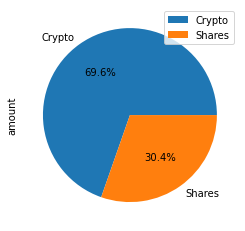

In [30]:
# Plot savings pie chart
labels = 'Crypto', 'Shares'
df_savings.plot.pie(y='amount',subplots=False, autopct='%1.1f%%',labels=labels)

In [43]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Total Savings
total_savings = df_savings["amount"][0] + df_savings["amount"][1]

# Validate saving health
if total_savings > emergency_fund:
    print(f"Congratulations you have more than enough money in your investments in case of an emergency")
elif total_savings == emergency_fund:
    print(f"Congratulations you have reached your financial goal of having enough money in case of emergency")
elif total_savings < emergency_fund:
    print(f"You are ${(round(total_savings-emergency_fund,2)*-1)} away from having enough money in case of emergency") 

Congratulations you have more than enough money in your investments in case of an emergency


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

# Display sample data
df_stock_data.head()

In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Printing the simulation input data
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")